<a href="https://colab.research.google.com/github/dhruvsh19/CampusRecruitment/blob/master/Indian%20Dance%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**17DIT065**

In [1]:
from fastai.vision import *

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [4]:
cd 'My Drive'

/gdrive/My Drive


In [5]:
cd 'Indian Classical Dance'

/gdrive/My Drive/Indian Classical Dance


In [6]:
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir

In [7]:
classes = ['Bharatanatyam','kathak','Kuchipudi','odissi','Kathakali','Manipuri','Mohiniyattam']

In [8]:

path = base_dir + "Indian Classical Dance"

In [9]:
for c in classes:
    print(c)
    p = path + '/' + c
    verify_images(p, delete=True, max_size=500)

Bharatanatyam
kathak
Kuchipudi
odissi
Kathakali
Manipuri
Mohiniyattam


In [10]:
print(path)

/content/gdrive/My Drive/Indian Classical Dance


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
path=""
ds_tfms=get_transforms()
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, size=224, num_workers=0).normalize(imagenet_stats)

In [13]:
data.classes

['Bharatanatyam',
 'Kathakali',
 'Kuchipudi',
 'Manipuri',
 'Mohiniyattam',
 'kathak',
 'odissi']

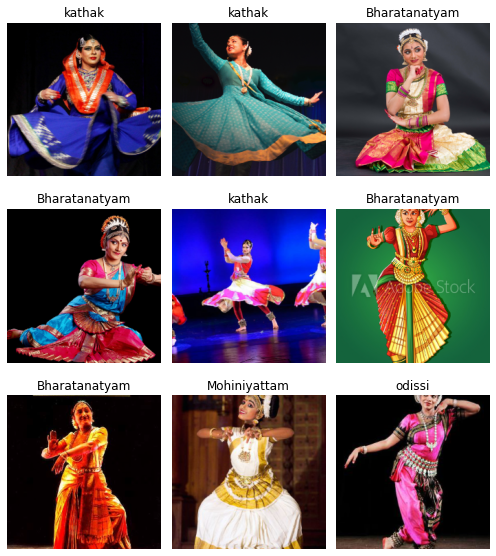

In [14]:
data.show_batch(rows=3, figsize=(7,8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Bharatanatyam',
  'Kathakali',
  'Kuchipudi',
  'Manipuri',
  'Mohiniyattam',
  'kathak',
  'odissi'],
 7,
 272,
 68)

In [16]:
learn = cnn_learner(data, models.resnet101, metrics=[error_rate,accuracy])

In [17]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.818374,1.484794,0.470588,0.529412,00:49
1,1.677005,1.609549,0.323529,0.676471,00:20
2,1.135157,1.365162,0.264706,0.735294,00:20
3,0.842741,1.063800,0.220588,0.779412,00:20
4,0.656651,0.952140,0.235294,0.764706,00:21


In [18]:
learn.save('stage-1')

In [19]:
learn.unfreeze()

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


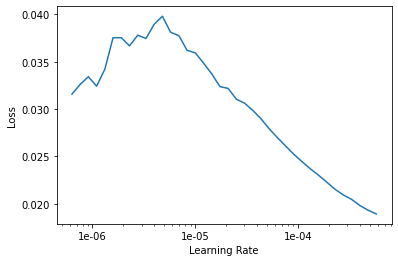

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(4,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.035215,0.909108,0.235294,0.764706,00:20
1,0.031360,0.873076,0.235294,0.764706,00:21
2,0.027997,0.869120,0.235294,0.764706,00:21
3,0.023128,0.873772,0.235294,0.764706,00:21


In [23]:
learn.save('stage-2')

In [24]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (272 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
kathak,kathak,kathak,kathak,kathak
Path: .;

Valid: LabelList (68 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Kathakali,odissi,Bharatanatyam,Manipuri,kathak
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

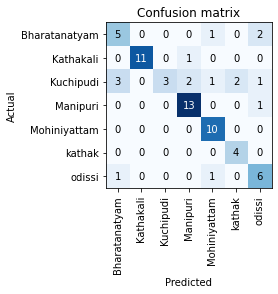

In [26]:
interp.plot_confusion_matrix()

In [27]:
interp.most_confused(min_val=2)

[('Kuchipudi', 'Bharatanatyam', 3),
 ('Bharatanatyam', 'odissi', 2),
 ('Kuchipudi', 'Manipuri', 2),
 ('Kuchipudi', 'kathak', 2)]

In [28]:
learn.export()

In [ ]:
img = open_image('od.jpg')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class